# What is an artificial neural network (ANN)?
ANN is the foundation of AI and one of the main tools used in ML inspired by the human brain when networks of neurons 
analyze and process information. ANNs have self-learning capabilities and can learn from their experience that enables them 
to produce better results as more data becomes available.
In this computational model, neural networks consist of input and output layers also there is a hidden layer (in most cases)
that transforms the input to the usable data for the output layer. ANN initially goes through a training phase. During this 
supervised phase, the network is taught what to look for and what is the desired output. The difference between the results 
is adjusted using backpropagation (going from output to input) in order to achieve the lowest possible difference between 
the actual and desired outcome.

In this notebook, I trained ANN model on the HAXBY dataset.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import keras
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from nilearn.input_data import NiftiMasker
from nilearn import datasets, plotting, image
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import confusion_matrix
from nilearn.plotting import plot_anat, show, plot_stat_map, plot_matrix

In [3]:
# Designate input file
haxby_ds = datasets.fetch_haxby(subjects=[4], fetch_stimuli=True)

# 'func' is a list of filenames: one for each subject
func_file = haxby_ds.func[0]

# Standardizing
mask_vt_file = haxby_ds.mask_vt[0]
masker = NiftiMasker(mask_img=mask_vt_file, standardize=True)

# Load the behavioral data that I will predict
beh_label = pd.read_csv(haxby_ds.session_target[0], sep=" ")

# Regressout the resting state
nonrest_task_mask = (beh_label['labels'] != 'rest')

In [4]:
# Selecting data

# X contains the features
X = masker.fit_transform(func_file)[nonrest_task_mask]

# y contains the target variable
y = beh_label['labels'][nonrest_task_mask]

In [5]:
# Remove the resting state and find names of remaining active labels
categories = y[nonrest_task_mask].unique()

# Get the labels of the numerical conditions represented by the vector y
unique_conditions, order = np.unique(categories, return_index=True)

# Sort the conditions by the order of appearance
unique_conditions = unique_conditions[np.argsort(order)]

# Extract tags indicating to which acquisition run a tag belongs
session_labels = beh_label['chunks'][nonrest_task_mask]

In [6]:
# Encoding the string to numerical values. (ML Algorithm can only work on numbers and not on string)
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)

In [7]:
y.shape

(864,)

In [8]:
type(y)

numpy.ndarray

In [9]:
print(y)

[3 3 3 3 3 3 3 3 3 2 2 2 2 2 2 2 2 2 5 5 5 5 5 5 5 5 5 7 7 7 7 7 7 7 7 7 6
 6 6 6 6 6 6 6 6 4 4 4 4 4 4 4 4 4 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1
 1 1 1 1 1 1 1 6 6 6 6 6 6 6 6 6 5 5 5 5 5 5 5 5 5 2 2 2 2 2 2 2 2 2 0 0 0
 0 0 0 0 0 0 7 7 7 7 7 7 7 7 7 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 3 3 3 3
 3 3 3 3 3 6 6 6 6 6 6 6 6 6 5 5 5 5 5 5 5 5 5 7 7 7 7 7 7 7 7 7 0 0 0 0 0
 0 0 0 0 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 4 4 4 4 4 4 4 4 4 3 3 3 3 3 3
 3 3 3 1 1 1 1 1 1 1 1 1 6 6 6 6 6 6 6 6 6 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5
 5 5 2 2 2 2 2 2 2 2 2 7 7 7 7 7 7 7 7 7 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1
 1 6 6 6 6 6 6 6 6 6 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 7 7 7 7 7 7 7 7 7
 4 4 4 4 4 4 4 4 4 3 3 3 3 3 3 3 3 3 5 5 5 5 5 5 5 5 5 3 3 3 3 3 3 3 3 3 1
 1 1 1 1 1 1 1 1 7 7 7 7 7 7 7 7 7 2 2 2 2 2 2 2 2 2 5 5 5 5 5 5 5 5 5 0 0
 0 0 0 0 0 0 0 4 4 4 4 4 4 4 4 4 6 6 6 6 6 6 6 6 6 4 4 4 4 4 4 4 4 4 6 6 6
 6 6 6 6 6 6 3 3 3 3 3 3 3 3 3 7 7 7 7 7 7 7 7 7 2 2 2 2 2 2 2 2 2 1 1 1 1
 1 1 1 1 1 0 0 0 0 0 0 0 

In [10]:
test = np.reshape(y, (864,1))
y = test

In [11]:
y.shape

(864, 1)

In [12]:
type(y)

numpy.ndarray

In [13]:
# creating instance of one-hot-encoder
enc = OneHotEncoder(handle_unknown='ignore')
# passing bridge-types-cat column (label encoded values of bridge_types)
y = pd.DataFrame(enc.fit_transform(y).toarray())
y

,0,1,2,3,4,5,6,7
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
859,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
860,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
861,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
862,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [14]:
# shuffle and split the data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=True, random_state = 0)

#standarize features caling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
X_train.shape

(777, 675)

In [16]:
type(X_train)

numpy.ndarray

## Initializing the ANN

In [17]:
classifier = Sequential()

In [18]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(338 , input_dim = 675, init = 'uniform', activation = 'relu'))

/home/srastegarnia/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(338, input_dim=675, activation="relu", kernel_initializer="uniform")`
  


In [19]:
# Adding the second hidden layer
classifier.add(Dense(169, init = 'uniform', activation = 'relu'))

/home/srastegarnia/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(169, activation="relu", kernel_initializer="uniform")`
  


In [20]:
classifier.add(Dense(8, activation = 'softmax'))

In [21]:
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 338)               228488    
_________________________________________________________________
dense_2 (Dense)              (None, 169)               57291     
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 1360      
Total params: 287,139
Trainable params: 287,139
Non-trainable params: 0
_________________________________________________________________


In [22]:
# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [23]:
# Fitting the ANN to the Training set
classifier.fit(X_train, y_train, batch_size = 10, nb_epoch = 20)

/home/srastegarnia/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Epoch 1/20
777/777 [==============================] - 1s 1ms/step - loss: 1.6764 - accuracy: 0.3887
Epoch 2/20
777/777 [==============================] - 0s 520us/step - loss: 0.8753 - accuracy: 0.6937
Epoch 3/20
777/777 [==============================] - 0s 488us/step - loss: 0.4128 - accuracy: 0.8752
Epoch 4/20
777/777 [==============================] - 0s 490us/step - loss: 0.2437 - accuracy: 0.9266
Epoch 5/20
777/777 [==============================] - 0s 472us/step - loss: 0.1356 - accuracy: 0.9601
Epoch 6/20
777/777 [==============================] - 0s 460us/step - loss: 0.1421 - accuracy: 0.9601
Epoch 7/20
777/777 [==============================] - 0s 622us/step - loss: 0.0746 - accuracy: 0.9794
Epoch 8/20
777/777 [==============================] - 0s 461us/step - loss: 0.0245 - accuracy: 0.9974
Epoch 9/20
777/777 [==============================] - 0s 473us/step - loss: 0.0081 - accuracy: 0.9987
Epoch 10/20
777/777 [==============================] - 0s 489us/step - loss: 0.0022 

In [24]:
# Making the predictions and evaluating the model
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

In [25]:
cm = confusion_matrix(y_test.values.argmax(axis=1), y_pred.argmax(axis=1))
print(cm)

[[ 8  0  0  0  0  0  0  0]
 [ 0 13  0  0  0  0  0  0]
 [ 1  0 12  0  2  0  0  0]
 [ 1  0  0 14  0  0  0  0]
 [ 0  0  0  0 11  0  0  0]
 [ 0  0  1  0  0  9  0  0]
 [ 0  0  0  0  0  0  6  0]
 [ 1  0  1  0  0  0  0  7]]


(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text yticklabel objects>)

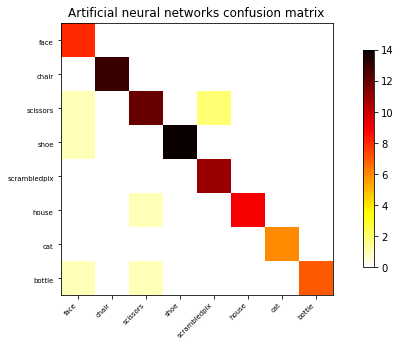

In [26]:
# Plotting the confusion matrix
plot_matrix(cm, cmap='hot_r', labels=unique_conditions)
plt.title('Artificial neural networks confusion matrix')
plt.xticks(rotation=45)
plt.yticks(rotation=0)